## Actividad 6

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('temps.csv')
df.sample()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
186,2016,7,8,Fri,76,68,74.6,74,72,79,75,77


#### 1.  Para identificar anomalías, obtenga un resumen estadístico, o dicho de otro modo, realice un análisis descriptivo de sus datos, comente.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


#### 2.  Realice  un  análisis  gráfico  de  las  temperaturas máximas  históricas, las temperaturas de los dos días anteriores y la estimación del amigo, con respecto a la fecha. Comente si hay anomalías.

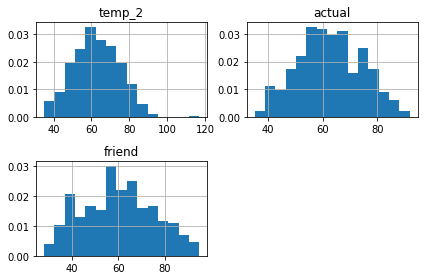

In [7]:
graph = df[["temp_2", "actual", "friend"]]
graph.hist(bins = 15, density = True)
plt.tight_layout() #para que no se superpongan las gráficas
plt.show()

#### 3.  Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.

In [13]:
week_dummie = pd.get_dummies(df["week"])
week_dummie

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [16]:
df = df.drop(columns=["week"])
df = pd.concat([df,week_dummie], axis=1)
df.sample(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
311,2016,11,25,49,52,48.6,52,45,52,47,41,1,0,0,0,0,0,0
8,2016,1,9,45,48,46.4,50,46,50,45,47,0,0,1,0,0,0,0
75,2016,3,19,58,63,54.2,61,54,59,54,62,0,0,1,0,0,0,0
109,2016,4,22,81,73,59.7,64,59,64,60,59,1,0,0,0,0,0,0
337,2016,12,21,46,51,45.1,49,44,50,46,39,0,0,0,0,0,0,1


#### 4.  Ahora, separe los datos en predictores y variable respuesta. Su variable Y  es  la  temperatura  máxima  real  y  los  predictores  son  todas  las columnas que usa el modelo para hacer una predicción. Asegúrese de transformar  en  una  matriz  Numpy  porque  esa  es  la  forma  en  que funciona el algoritmo.

In [17]:
Y = df["actual"].values.reshape(-1,1)
X = df.drop("actual", axis = 1)

#### 5.  Separe  su  base  en  entrenamiento  y  testeo  en  75/25.  Use  una  semilla (random_state = 42) para obtener los mismos valores.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42
)

#### 6.  Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días.

In [27]:
Y_mean_predict = df["average"]
Y = df["actual"]

In [28]:
#rmse
rmse = mean_squared_error(
        y_true  = Y,
        y_pred  = Y_mean_predict,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.847503530316808


# Ajustar el modelo

#### 7.  Ajuste  un  modelo  de  regresión  de  bosque  aleatorio  con  los  datos  de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.

In [ ]:
#definición de datos y target
Y_1 = df["average"].values.reshape(-1,1)
X_1 = df.drop(["average","actual"], axis = 1)

#partición en train y test
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42
)

In [24]:
# Create a Random Forest regressor
rf_1 = RandomForestRegressor(
    n_estimators=1000,
    random_state=42
)

# Train the regressor
rf_1.fit(X_train, y_train)

D:\Temp\ipykernel_14264\4012055744.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_1.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

#### 8.  Obtenga la predicción. Coméntalo.

In [25]:
y_pred = rf_1.predict(X_test)
print(y_pred)

[69.857 61.319 51.891 61.321 66.463 70.162 78.848 75.786 62.121 74.078
 63.647 72.176 38.472 62.433 71.594 56.012 60.943 56.995 56.748 76.113
 63.758 54.401 66.493 62.468 58.786 53.032 66.769 46.448 62.122 80.176
 73.833 64.313 55.188 81.972 74.178 61.695 53.636 51.424 68.929 42.452
 70.385 57.373 76.172 42.396 61.098 74.08  52.745 81.369 53.325 42.487
 46.507 42.144 64.17  65.709 74.13  61.339 55.177 59.945 54.651 59.664
 65.491 50.052 60.849 70.188 60.062 59.236 71.743 69.796 76.83  41.32
 76.868 56.783 60.378 50.519 54.426 64.003 43.711 74.354 47.306 52.326
 53.526 68.21  73.607 72.658 63.243 57.175 46.04 ]


#### 9.  Obtenga las métricas de precisión.

In [26]:
#error
print(rf_1.score(X_test, y_test))

#rmse
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

0.8128487257488989
El error (rmse) de test es: 5.101657512937373


#### 10.  ¿Considera que el modelo es adecuado?

Si comparamos el desempeño del modelo en base al valor de RMSE de el modelo de random forest vs usando el promedio de temperatura medida vemos que el error disminuye en las predicciones y obtenemos un modelo mas preciso.